<a href="https://colab.research.google.com/github/RoniAguilar/Tareas_EstadisticaAplicada_17/blob/main/VVAO_1855188_EAG51_actividad8_mar2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 8
**Estadística Aplicada**

**Nombre:** Verónica Vanessa Aguilar Ortiz

**Matricula:** 1855188

**Grupo:** 051

# Pronóstico de una acción de BIMBO MÉXICO

En esta notebook vamos a realizar el pronóstico de una serie de tiempo, para saber el precio de la acción el dia lunes 14 de marzo de 2022.
1. Descargaremos los datos
2. Graficaremos la series para darnos una idea de su comportamiento
3. realizaremos una prueba de raíz unitaria para comprobrar si la serie es estacionaria
4. Diferenciaremos la serie en caso de que no sea estacionaria
5. Realizamos la prueba a la serie diferenciada para ver si es estacionaria
6. Graficaremos la serie estacionaria
7. realizaremos su ACF y PACF para tratar de identificar que tipo de proceso es MA(q), AR(P), ARMA(p,q), etc
8. Estimamos distintos modelos
9. Elegimos el modelo
10. Realizamos el pronóstico 

In [ ]:
#Librerias a utilizar
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA


%matplotlib inline

In [ ]:
#Tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

## 1. Importamos los datos desde la api de yahoo finance

Se importan las acciones de Bimbo México y se tomaran los datos, exactamente de los ultimos 4 años hasta el dia viernes 12 de marzo de 2022, que es cuando estuvo abierta la bolsa.


In [ ]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
bimbo = yf.download('BIMBOA.MX', 
                       start='2018-03-12', 
                       end='2022-03-12',
                       progress=False)

In [ ]:
#Ultimos 10 datos
bimbo.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-28,63.580002,65.050003,62.570000,63.070000,63.070000,4687520
2022-03-01,63.189999,64.139999,60.299999,62.330002,62.330002,4579432
2022-03-02,62.529999,63.709999,61.700001,61.900002,61.900002,3233303
2022-03-03,61.959999,62.610001,58.810001,59.209999,59.209999,4968108
2022-03-04,59.189999,59.400002,57.200001,57.439999,57.439999,4361629
2022-03-07,57.220001,57.320000,52.959999,53.200001,53.200001,5164699
2022-03-08,53.389999,54.590000,51.779999,54.209999,54.209999,5506010
2022-03-09,54.770000,57.000000,54.209999,56.459999,56.459999,3189589
2022-03-10,56.490002,58.209999,55.009998,57.099998,57.099998,4023856


In [ ]:
##Renombramos columna 'Adj Close' por adj_close 
bimbo.rename(columns = {'Adj Close':'adj_close'}, inplace=True)

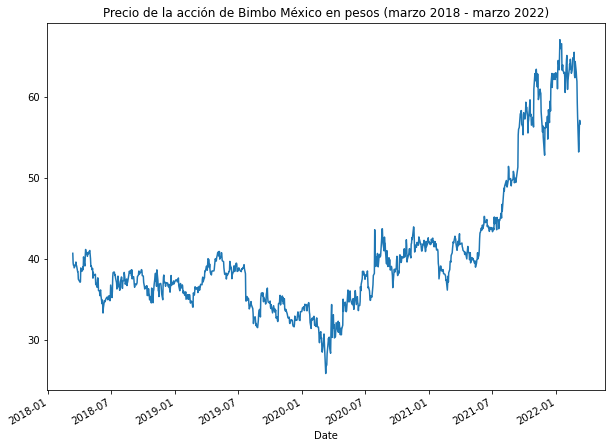

In [ ]:
#Grafica del precio de la acción de Bimbo México en pesos (marzo 2018 - marzo 2022)
bimbo.adj_close.plot()
plt.title('Precio de la acción de Bimbo México en pesos (marzo 2018 - marzo 2022)')
plt.show()

In [ ]:
#Prueba de dickey fuller aumentada ADF
adf = adfuller(bimbo['adj_close'])

#presentamos el p-value
print('p-value: %f' % adf[1])



p-value: 0.855526


Recuerda que $H_0$: serie no estacionaria

In [ ]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value = 0.856
 NO se rechaza hipótesis nula, serie no estacionaria


Nuestra serie no es estacionaria y para hacerla una serie estacionaria, usamos la función shift de pandas 
y guardamos la serie diferenciada en un objeto aparte.

In [ ]:
bimbo_diff = bimbo['adj_close'] - bimbo['adj_close'].shift()

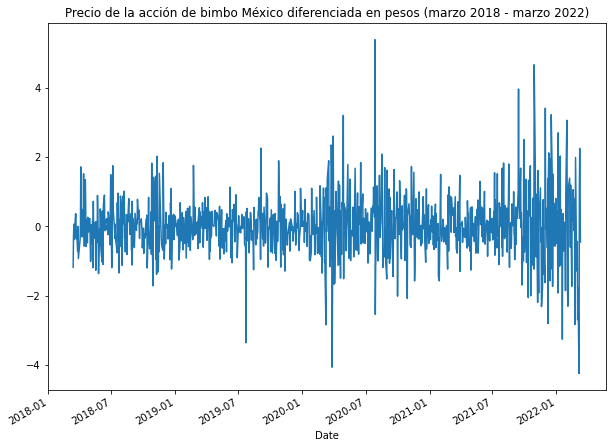

In [ ]:
#Grafica del precio de la acción de bimbo México diferenciada en pesos
bimbo_diff.plot()
plt.title('Precio de la acción de bimbo México diferenciada en pesos (marzo 2018 - marzo 2022)')
plt.show()

In [ ]:
#eliminamos los Nan
bimbo_diff = bimbo_diff.dropna()

In [ ]:
## como la serie tiene saltos (los fines de semana los mercados no abren)
## removeremos la fecha
bimbo_diff = bimbo_diff.reset_index()

### eliminamos columna fecha
bimbo_diff = bimbo_diff.drop(['Date'], axis=1)

In [ ]:
bimbo_diff

,adj_close
0,-1.179291
1,-0.301899
2,0.066036
3,-0.377369
4,0.367939
...,...
1002,-4.239998
1003,1.009998
1004,2.250000
1005,0.639999


volvemos a realizar la prueba de raíz unitaria ADF

In [ ]:
adf1 = adfuller(bimbo_diff)
if adf1[1] < 0.05:
    
    print(f'con un un p-value={adf1[1]}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf1[1]}\n NO se rechaza hipótesis nula, serie no estacionaria') 


con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


Ahora nuestra  serie ya es estacionaria, realizamos el pronóstico con ella, pero primero identificamos que tipo de proceso es.


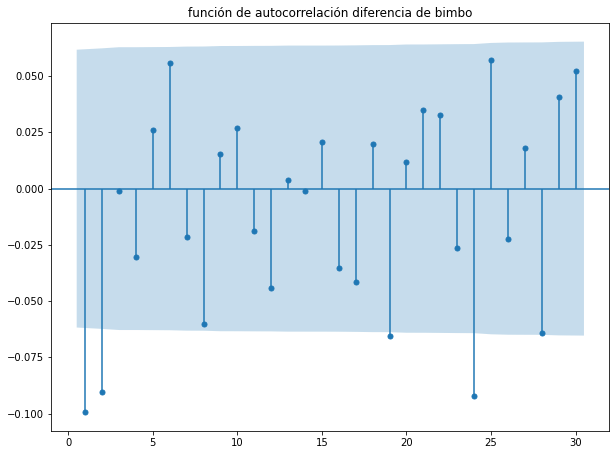

In [ ]:
#grafica de autocorrelación ACF
plot_acf(bimbo_diff, zero=False, lags=30)
plt.title('función de autocorrelación diferencia de bimbo')
plt.show()

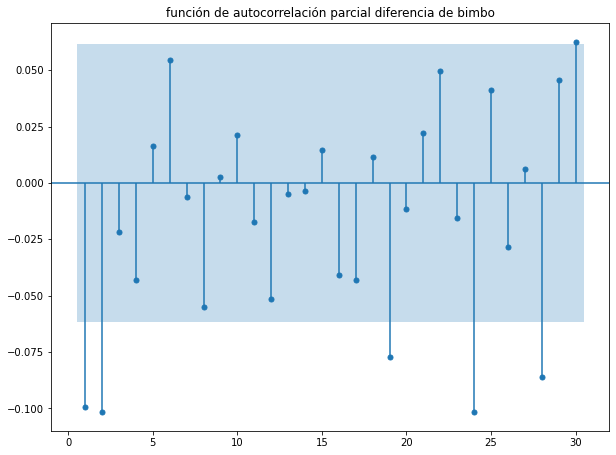

In [ ]:
#grafica de autocorrelación parcial PACF
plot_pacf(bimbo_diff, zero=False, lags=30)
plt.title('función de autocorrelación parcial diferencia de bimbo')
plt.show()

Aunque los ACF y PACF nos sugieren un modelo ARMA, asi que para comprobar estimamos varios modelos con 6 rezagos de AR, 6 rezagos de MA y elegir uno de acuerdo con el BIC (criterio bayesiano de información) y el AIC.

In [ ]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(bimbo_diff, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3
AR: 4, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 3
AR: 6, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   2575.883779  2585.713241
   1   2565.427007  2580.171200
   2   2558.312966  2577.971890
   3   2560.312963  2584.886617
   4   2562.028625  2591.517011
   5   2562.952681  2597.355797
   6   2562.718972  2602.036819
1  0   2567.865159  2582.609351
   1   2560.468639  2580.127562
   2   2560.312973  2584.886627
   3   2562.311918  2591.800303
   4   2563.842083  2598.245199
   5   2564.401750  2603.719597
   6   2564.452041  2608.684619
2  0   2559.433118  2579.092042
   1   2560.491185  2585.064839
   2   2562.072054  2591.560439
   3   2564.043807  2598.446923
   4   2536.501522  2575.819370
   5   2545.129970  2589.362548
   6   2540.330982  2589.478291
3  0   2560.950945  2585.524599
   1   2562.470161  2591.958546
   2   2564.014425  2598.417541
   3   2564.718999  2604.036846
   4   2541.695759  2585.928337
   5   2553.292033  2602.439342
   6   2541.321843  2595.383883
4  0   2561.064045  2590.552430
   1   2562.983079  2597.386195
   2   2539.234202  2578.552049
   3   2561.981799  2606.214377
   4   2544.489132  2593.636441
   5   2542.937164  2596.999204
   6   2543.971332  2602.948103
5  0   2562.772044  2597.175160
   1   2563.989898  2603.307745
   2   2543.518666  2587.751245
   3   2541.645969  2590.793278
   4   2541.759920  2595.821960
   5   2543.750294  2602.727064
   6   2547.394681  2611.286183
6  0   2561.571329  2600.889176
   1   2563.565686  2607.798264
   2   2539.311675  2588.458984
   3   2564.304964  2618.367004
   4   2543.790296  2602.767067
   5   2545.765429  2609.656931
   6   2546.831257  2615.637490

Primero los ordenamos de acuerdo a nuestro primer indicador al BIC.

In [ ]:
ic.sort_values('BIC', ascending = True)

,,AIC,BIC
AR,MA,,
2,4,2536.501522,2575.819370
0,2,2558.312966,2577.971890
4,2,2539.234202,2578.552049
2,0,2559.433118,2579.092042
1,1,2560.468639,2580.127562
0,1,2565.427007,2580.171200
1,0,2567.865159,2582.609351
0,3,2560.312963,2584.886617
1,2,2560.312973,2584.886627


el BIC me sugiere un ARMA(2,4)

Ahora utilizamos nuestro segundo indicador, el criterio de Akaike (AIC)

In [ ]:
ic.sort_values('AIC', ascending = True)

,,AIC,BIC
AR,MA,,
2,4,2536.501522,2575.819370
4,2,2539.234202,2578.552049
6,2,2539.311675,2588.458984
2,6,2540.330982,2589.478291
3,6,2541.321843,2595.383883
5,3,2541.645969,2590.793278
3,4,2541.695759,2585.928337
5,4,2541.759920,2595.821960
4,5,2542.937164,2596.999204


Al igual que el BIC, el AIC me sugiere un ARMA (2,4)

In [ ]:
#estimamos un ARMA (2,4)
modelo = ARIMA(bimbo_diff, order=(2, 0, 4))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                 1007
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -1260.251
Date:                Sun, 13 Mar 2022   AIC                           2536.502
Time:                        17:01:07   BIC                           2575.819
Sample:                             0   HQIC                          2551.440
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0146      0.022      0.664      0.507      -0.028       0.058
ar.L1         -0.1366      0.015     -9.371      0.000      -0.165      -0.108
ar.L2         -0.9356      0.012    -76.053      0.000      -0.960      -0.912
ma.L1          0.0235      0.025      0.951      0.342      -0.025       0.072
ma.L2          0.8662      0.027     31.799      0.000       0.813       0.920
ma.L3         -0.1068      0.024     -4.546      0.000      -0.153      -0.061
ma.L4         -0.1208      0.025     -4.797      0.000      -0.170      -0.071
sigma2         0.7184      0.020     36.377      0.000       0.680       0.757
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               985.11
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En realidad, en este caso, como diferenciamos una vez la serie de tiempo estacionaria para hacerla estacionaria, nuestro modelo ARMA (1,1), es un ARIMA(2,1,4) de la serie original.

In [ ]:
# estimamos un ARIMA (2,1,4)
modelo2 = ARIMA(bimbo['adj_close'], order=(2, 1, 4))
resultado2 = modelo2.fit()
resultado2.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likeliho

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                 1008
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -1260.457
Date:                Sun, 13 Mar 2022   AIC                           2534.913
Time:                        17:02:50   BIC                           2569.316
Sample:                             0   HQIC                          2547.984
                               - 1008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1364      0.014     -9.471      0.000      -0.165      -0.108
ar.L2         -0.9353      0.012    -76.519      0.000      -0.959      -0.911
ma.L1          0.0211      0.024      0.863      0.388      -0.027       0.069
ma.L2          0.8617      0.031     27.913      0.000       0.801       0.922
ma.L3         -0.1100      0.023     -4.695      0.000      -0.156      -0.064
ma.L4         -0.1260      0.025     -5.019      0.000      -0.175      -0.077
sigma2         0.7137      0.021     33.680      0.000       0.672       0.755
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               992.28
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.94   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Estimar la serie con el modelo ARIMA
bimbo['pronostico'] = resultado2.predict()
bimbo['pronostico'][0] = bimbo['adj_close'][0]

C:\Users\RYZEN3~1\AppData\Local\Temp/ipykernel_11524/880723661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bimbo['pronostico'][0] = bimbo['adj_close'][0]


graficamos la y_estimada con la y_original

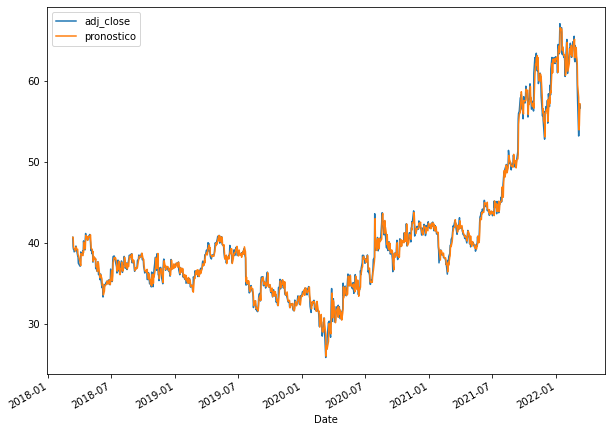

In [ ]:
bimbo[['adj_close', 'pronostico']].plot()
plt.show()

In [ ]:
#calculamos cuantas observaciones tenemos para hacer nuestra predicción
len(bimbo)

1008

la función len nos arrojo que tenemos 1008 observaciones,  quiere decir que el lunes sería la observación 1009, el martes la 1010, y el miércoles la 1011

In [ ]:
## vamos a pronosticar esos días
resultado2.predict(1009, 1011)

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1009    56.245229
1010    56.301693
1011    56.674853
Name: predicted_mean, dtype: float64

mi pronostico para el lunes 14 de marzo es que la acción de bimbo tenga un precio de cierre (ajustado) de 56.245229

El viernes cerro en 56.60